In [1]:
%matplotlib widget
import sys
from pathlib import Path
# Going back two levels would be the grandparent directory of root_path
grandparent_path = Path().absolute().parents[1]
if str(grandparent_path) not in sys.path:
    sys.path.append(str(grandparent_path))
import matplotlib.pyplot as plt
from numpy import sqrt
from Modularize.support.QDmanager import QDmanager
from Modularize.support.QuFluxFit import convert_netCDF_2_arrays

Load and Format File 

In [2]:
QD_agent = QDmanager(r"D:\SynologyDrive\12 Codes\RF\20240224_QM_opt\Quela_Qblox\Modularize\QD_backup\2024_5_10\DRKE#116_SumInfo.pkl")
QD_agent.QD_loader()
nc_path = r"D:\SynologyDrive\09 Data\Fridge Data\Qubit\20240501_DRKe_5Q4C#6\20240509\q2\Zline_Crosstalk\q2z4\DRKEq1_Flux2tone_H1M36S4.nc"
ref = QD_agent.refIQ['q1']

Old friends loaded!


(20, 20) (20,) (20,)


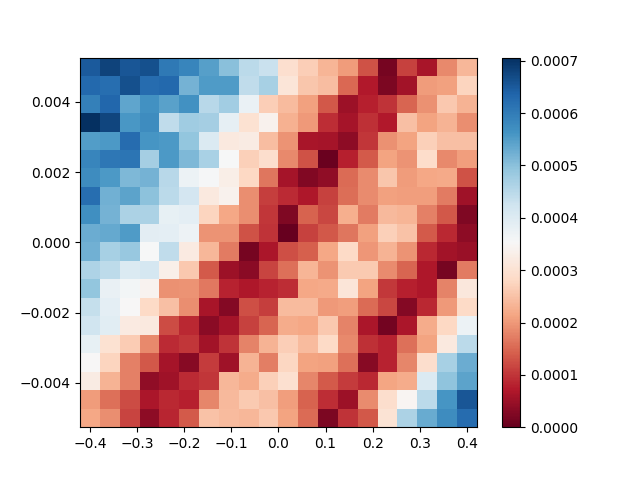

In [3]:

d_z_target_amp, d_z_crosstalk_amp, i, q = convert_netCDF_2_arrays(nc_path)
data = sqrt((i - i[len(i)//2][len(i)//2])**2 + (q - q[len(i)//2][len(i)//2])**2).transpose()
print(data.shape, d_z_target_amp.shape, d_z_crosstalk_amp.shape)


fig, ax = plt.subplots()
c = ax.pcolormesh(d_z_crosstalk_amp, d_z_target_amp, data, cmap='RdBu')
fig.colorbar(c, ax=ax)
plt.show()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (220, 220)
length: 220, delta:0.04210526315789487
length: 220, delta:0.0005263157894736872
Maximum value: 0.038296401689224005
f_z_crosstalk: -0.7556818181818159
f_z_target: 43.18181818181793
k space: -57.14285714285698
crosstalk: 0.01750000000000005
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (220, 220)
length: 220, delta:0.04210526315789487
length: 220, delta:0.0005263157894736872
Maximum value: 0.038296401689224005
f_z_crosstalk: 0.7556818181818159
f_z_target: -43.18181818181793
k space: -57.14285714285698
crosstalk: 0.01750000000000005


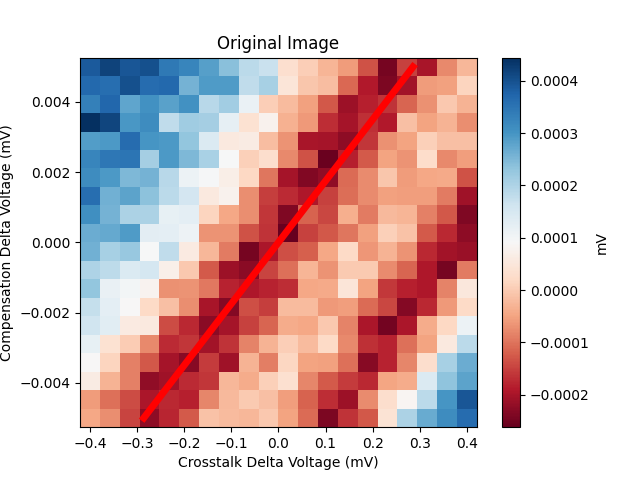

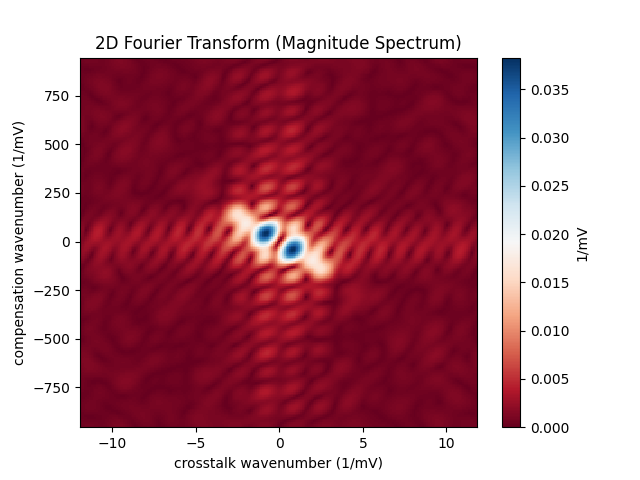

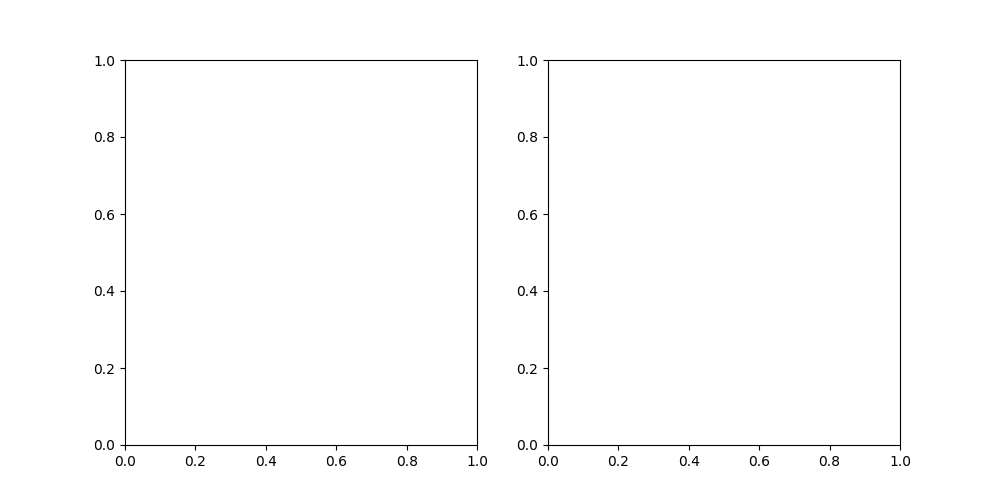

In [4]:
from qcat.zline_crosstalk.ramsey_2dfft import analysis_crosstalk_value
from qcat.visualization.zline_crosstalk import plot_analysis

analysis_crosstalk_value(d_z_crosstalk_amp, d_z_target_amp, data.transpose())
plot_analysis(d_z_crosstalk_amp, d_z_target_amp, data.transpose())